In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_curve,roc_auc_score,auc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#imported all library files

In [2]:
test = pd.read_csv('D:\Flip Robo\Malignant Comments Classifier Project/test.csv')
train = pd.read_csv('D:\Flip Robo\Malignant Comments Classifier Project/train.csv')

In [3]:
print(train.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [4]:
train.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
print(train.isnull().values.any())
print(train.isnull().sum())

False
id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


In [9]:
print(test.isnull().values.any())
print(test.isnull().sum())

False
id              0
comment_text    0
dtype: int64


In [10]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,348d654aca9af7d1,""" \n\n == Wikipedia is a Weird Encyclopedia ==..."
freq,1,1


In [12]:
corr_mat=train.corr()
corr_mat

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


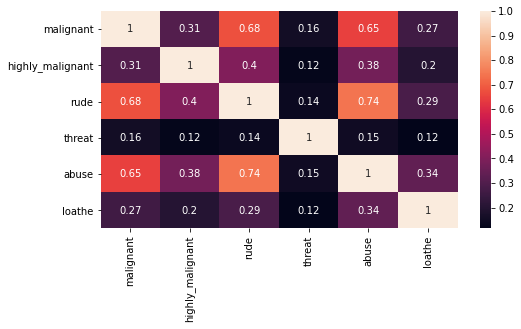

In [13]:
plt.figure(figsize=[8,4])
sns.heatmap(corr_mat,annot=True)
plt.title = ('Correlation Matrix')
plt.show()

In [46]:
train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

<AxesSubplot:xlabel='malignant', ylabel='count'>

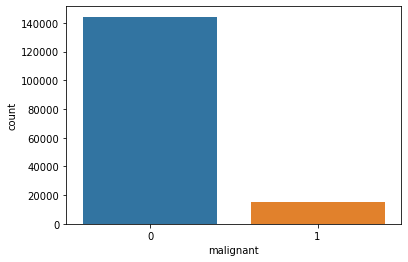

In [14]:
sns.countplot(train['malignant'])

In [47]:
train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

<AxesSubplot:xlabel='rude', ylabel='count'>

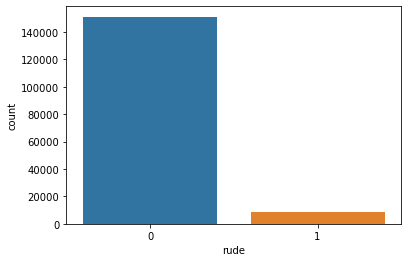

In [15]:
sns.countplot(train['rude'])

In [48]:
train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

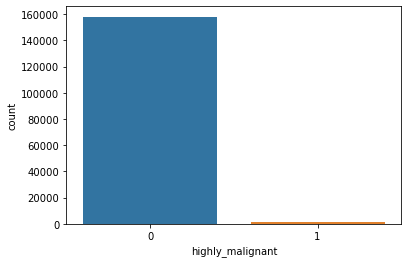

In [16]:
sns.countplot(train['highly_malignant'])

In [49]:
train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

<AxesSubplot:xlabel='threat', ylabel='count'>

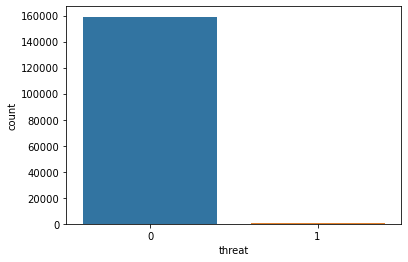

In [17]:
sns.countplot(train['threat'])

In [50]:
train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

<AxesSubplot:xlabel='abuse', ylabel='count'>

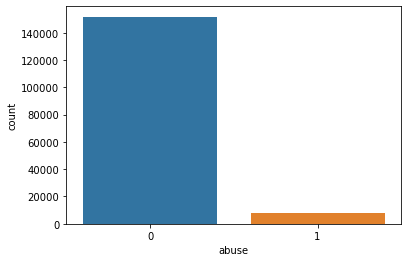

In [18]:
sns.countplot(train['abuse'])

In [51]:
train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

<AxesSubplot:xlabel='loathe', ylabel='count'>

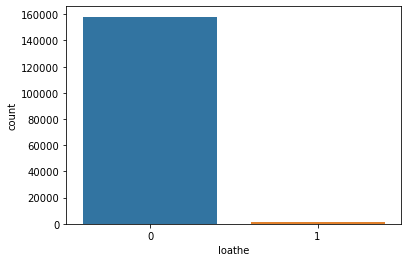

In [19]:
sns.countplot(train['loathe'])

In [20]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
train['comment_text'] = train['comment_text'].str.lower()
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

Convert all messages to lower case.

Replace email addresses with 'email'.

Replace URLs with 'webaddress'.

Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'.

Replace numbers with 'numbr'.

In [22]:
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

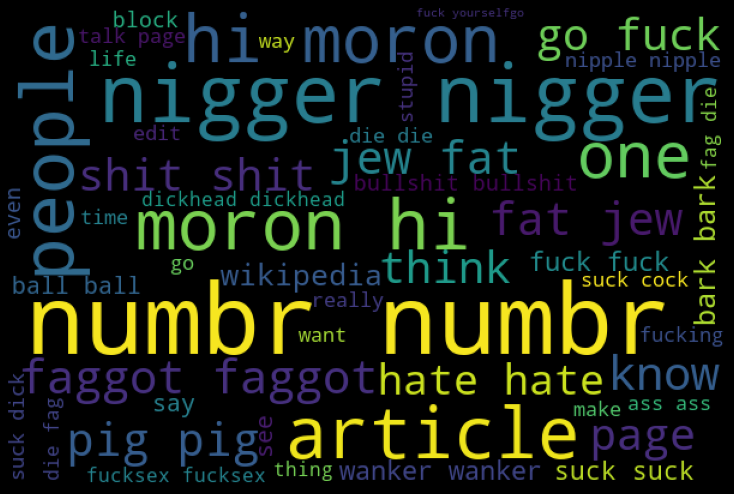

In [23]:
!pip install wordcloud
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#we can observe the words which are not appropriate.

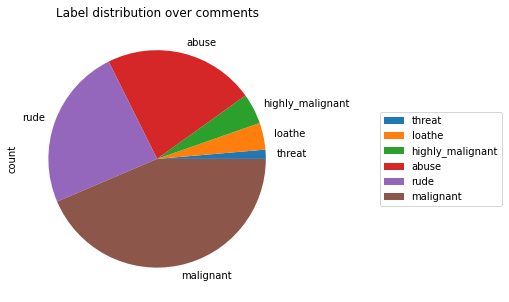

In [24]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [25]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])

In [27]:
x = features
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=.25)

In [28]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
logmodel_predict = logmodel.predict(x_train)
logmodel_predict_test = logmodel.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,logmodel_predict))
print('test_accuracy: ',accuracy_score(y_test,logmodel_predict_test))
print(confusion_matrix(y_test,logmodel_predict_test))
print(classification_report(y_test,logmodel_predict_test))

train_accuracy:  0.9596584167516169
test_accuracy:  0.9561075877973579
[[35677   187]
 [ 1564  2465]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35864
           1       0.93      0.61      0.74      4029

    accuracy                           0.96     39893
   macro avg       0.94      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



Logistic: ROC AUC=0.803


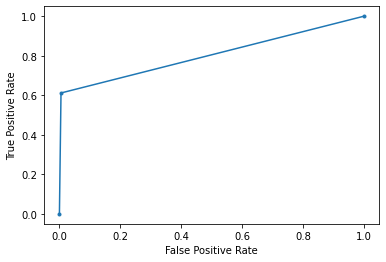

In [32]:
logmodel_auc = roc_auc_score(y_test, logmodel_predict_test)
print('Logistic: ROC AUC=%.3f' % (logmodel_auc))
logmodel_fpr, logmodel_tpr, _= roc_curve(y_test, logmodel_predict_test)
plt.plot(logmodel_fpr, logmodel_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_train)
rf_predict_test = rf.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,rf_predict))
print('test_accuracy: ',accuracy_score(y_test,rf_predict_test))
print(confusion_matrix(y_test,rf_predict_test))
print(classification_report(y_test,rf_predict_test))

train_accuracy:  0.8987867444308896
test_accuracy:  0.8998821848444589
[[35864     0]
 [ 3994    35]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35864
           1       1.00      0.01      0.02      4029

    accuracy                           0.90     39893
   macro avg       0.95      0.50      0.48     39893
weighted avg       0.91      0.90      0.85     39893



Random Forest: ROC AUC=0.504


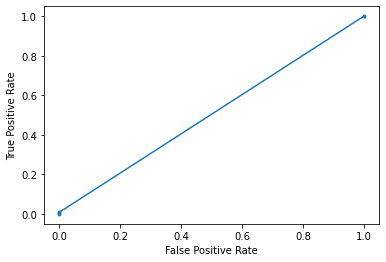

In [39]:
rf_auc = roc_auc_score(y_test, rf_predict_test)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict_test)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_train)
dt_predict_test = dt.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,dt_predict))
print('test_accuracy: ',accuracy_score(y_test,dt_predict_test))
print(confusion_matrix(y_test,dt_predict_test))
print(classification_report(y_test,dt_predict_test))

train_accuracy:  0.9402479987967713
test_accuracy:  0.9379841074875291
[[35698   166]
 [ 2308  1721]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35864
           1       0.91      0.43      0.58      4029

    accuracy                           0.94     39893
   macro avg       0.93      0.71      0.77     39893
weighted avg       0.94      0.94      0.93     39893



Decision Tree: ROC AUC=0.711


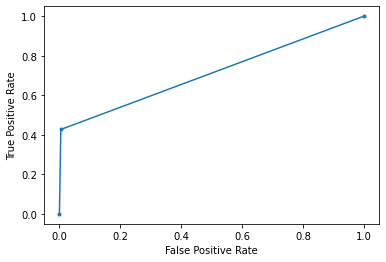

In [38]:
dt_auc = roc_auc_score(y_test, dt_predict_test)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predict_test)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_predict = knn.predict(x_train)
knn_predict_test = knn.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,knn_predict))
print('test_accuracy: ',accuracy_score(y_test,knn_predict_test))
print(confusion_matrix(y_test,knn_predict_test))
print(classification_report(y_test,knn_predict_test))

train_accuracy:  0.9201524089640536
test_accuracy:  0.918532073296067
[[35766    98]
 [ 3152   877]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     35864
           1       0.90      0.22      0.35      4029

    accuracy                           0.92     39893
   macro avg       0.91      0.61      0.65     39893
weighted avg       0.92      0.92      0.90     39893



Decision Tree: ROC AUC=0.607


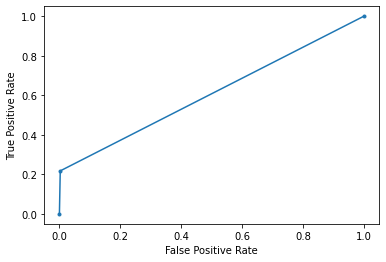

In [42]:
knn_auc = roc_auc_score(y_test, knn_predict_test)
print('Decision Tree: ROC AUC=%.3f' % (knn_auc))
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predict_test)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighbor Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [44]:
scr=cross_val_score(logmodel, x, y, cv=6)
print('Cross validation score of Logistic Regression : ',scr.mean())

scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of Decision Tree : ',scr.mean())

scr=cross_val_score(rf, x, y, cv=6)
print('Cross validation score of Random Forest Classifier : ',scr.mean())

scr=cross_val_score(knn, x, y, cv=6)
print('Cross validation score of KNeighbors Classifier : ',scr.mean())

Cross validation score of Logistic Regression :  0.9563329062380036
Cross validation score of Decision Tree :  0.9374009052641502
Cross validation score of Random Forest Classifier :  0.8988851340617403
Cross validation score of KNeighbors Classifier :  0.9182871529085824


From above cross validation, we can observe that Logistic Regression is having least difference between accuracy score and cross validation.

So, Logistic Regression Model with accuracy score of 95.96% is the best model.

In [45]:
import joblib
joblib.dump(logmodel,'Malignant_Comments.pkl')

['Malignant_Comments.pkl']